In [1]:
from importlib import reload
import make_models;reload(make_models)
del make_models;from make_models import *

In [2]:
cvae, z_encoder, s_encoder, cvae_decoder = get_MRI_CVAE_3D(input_shape=(64,64,64,1),
                                            latent_dim=2,
                                            beta=1,
                                            disentangle=False,
                                            gamma=1,
                                            bias=True,
                                            batch_size = 64,
                                            kernel_size = 3,
                                            filters = 32,
                                            intermediate_dim = 128,
                                            opt=None)

In [3]:
import numpy as np
asd_data_batch = np.random.rand(32,64,64,64)
td_data_batch = np.random.rand(32,64,64,64)

In [4]:
batch_loss = cvae.train_on_batch([asd_data_batch,td_data_batch])

100%|██████████| 25/25 [00:10<00:00,  2.43it/s]


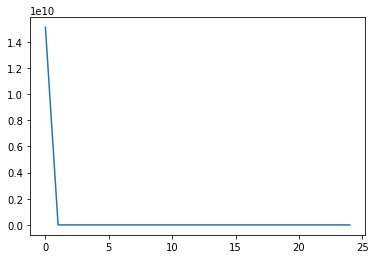

In [5]:
from matplotlib import pyplot as plt
from tqdm import tqdm

loss = list()
#for i in range(25):
for i in tqdm(range(25)):
    
    batch_loss = cvae.train_on_batch([asd_data_batch,td_data_batch])
    loss.append(batch_loss)
    
plt.plot(loss)

In [6]:
predictions= cvae.predict([[asd_data_batch,td_data_batch]])
asd_prediction = predictions[0]
td_prediction = predictions[1]

asd_prediction.shape

(32, 64, 64, 64, 1)

Text(0.5, 1.0, 'prediction/reconstruction')

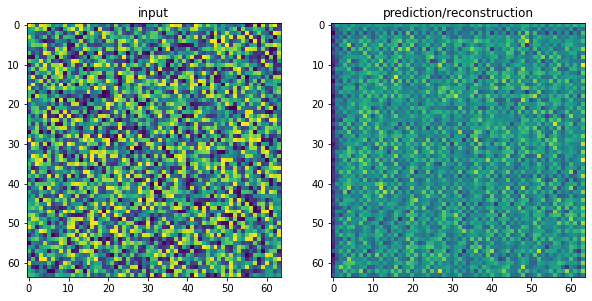

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1);
plt.imshow(asd_data_batch[0,:,:,32])
plt.title('input')

plt.subplot(1,2,2);
plt.imshow(asd_prediction[0,:,:,32,0])
plt.title('prediction/reconstruction')

In [48]:
# DATALOADER skeleton script
class CVAE_DataLoader:
    """A simple example dataloader"""
    
    def __init__(self):
        self.batch_id = 0 # count batches

    def get_batch(self):
        self.asd_data_batch = np.random.rand(32,64,64,64)
        self.td_data_batch = np.random.rand(32,64,64,64)
        
        self.batch_id += 1 # count batches 
        return self.asd_data_batch,self.td_data_batch


In [9]:
data_loader = CVAE_DataLoader()

In [10]:
print(data_loader.batch_id)

0


In [11]:
for i in range(10):
    a,b = data_loader.get_batch()
    
print(data_loader.batch_id)

10


## Reconstructing Brains

In [44]:
# RECONSTRUCT ASD BRAINS

bg_latents = z_encoder.predict(asd_data_batch)[2]
sl_latents = s_encoder.predict(asd_data_batch)[2]

print(bg_latents.shape)
print(sl_latents.shape)

stacked_latents = np.hstack((bg_latents,sl_latents))
print(stacked_latents.shape)

out = cvae_decoder.predict(stacked_latents)
print(out.shape)

(32, 2)
(32, 2)
(32, 4)
(32, 64, 64, 64, 1)


In [46]:
# RECONSTRUCT TD BRAINS

bg_latents = z_encoder.predict(td_data_batch)[2]
zeros_ = np.zeros(bg_latents.shape) # NO ASD SPECIFIC FEATURES

print(bg_latents.shape)
print(zeros_.shape)

stacked_latents = np.hstack((bg_latents,zeros_))
print(stacked_latents.shape)

out = cvae_decoder.predict(stacked_latents)
print(out.shape)

(32, 2)
(32, 2)
(32, 4)
(32, 64, 64, 64, 1)


In [47]:
# RECONSTRUCT ASD synthetic twins

bg_latents = z_encoder.predict(asd_data_batch)[2]
zeros_ = np.zeros(bg_latents.shape) # NO ASD SPECIFIC FEATURES

print(bg_latents.shape)
print(zeros_.shape)

stacked_latents = np.hstack((bg_latents,zeros_))
print(stacked_latents.shape)

out = cvae_decoder.predict(stacked_latents)
print(out.shape)

(32, 2)
(32, 2)
(32, 4)
(32, 64, 64, 64, 1)
